<a href="https://colab.research.google.com/github/AliTarek-1/Project-5.-Loan-Status-Prediction-using-Machine-Learning-with-Python-/blob/main/Project5_Loan_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import mean_squared_error , accuracy_score
from sklearn.svm import SVC , SVR


In [ ]:
data = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
X=data.drop(columns=["Loan_Status" , "Loan_ID"] , axis=1)
Y=data["Loan_Status"]

In [ ]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
Y.describe()

,Loan_Status
count,614
unique,2
top,Y
freq,422


In [ ]:
print(X)
print(Y)

     Gender Married Dependents  ... Loan_Amount_Term Credit_History  Property_Area
0      Male      No          0  ...            360.0            1.0          Urban
1      Male     Yes          1  ...            360.0            1.0          Rural
2      Male     Yes          0  ...            360.0            1.0          Urban
3      Male     Yes          0  ...            360.0            1.0          Urban
4      Male      No          0  ...            360.0            1.0          Urban
..      ...     ...        ...  ...              ...            ...            ...
609  Female      No          0  ...            360.0            1.0          Rural
610    Male     Yes         3+  ...            180.0            1.0          Rural
611    Male     Yes          1  ...            360.0            1.0          Urban
612    Male     Yes          2  ...            360.0            1.0          Urban
613  Female      No          0  ...            360.0            0.0      Semiurban

[61

In [ ]:
data.shape

(614, 13)

In [ ]:
X.shape

(614, 11)

In [ ]:
Y.shape

(614,)

In [ ]:
#number of missing value
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#drop the missing values
data= data.dropna()

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#label encoding
data.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

<ipython-input-91-2086c216a0ef>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
data= data.replace(to_replace='3+' ,  value=4)

In [ ]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

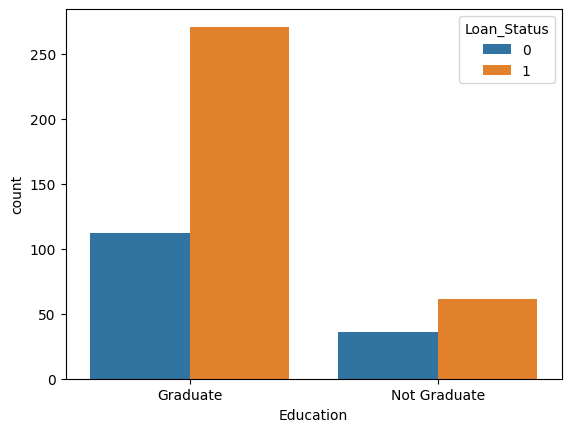

In [ ]:
sns.countplot(x='Education' , hue='Loan_Status' , data=data)

<Axes: xlabel='Married', ylabel='count'>

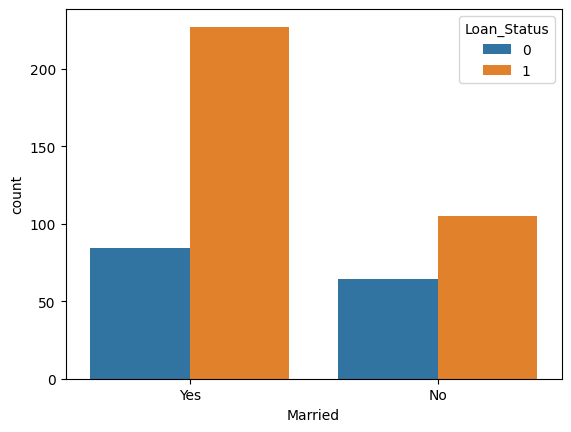

In [ ]:
sns.countplot(x='Married' , hue='Loan_Status' , data=data)

In [ ]:
data.replace({'Married': {'No':0 ,'Yes':1} , 'Gender':{'Male':1 , 'Female':0} , 'Self_Employed':{'No':0 , 'Yes':1} , 'Property_Area':{
    'Rural':0 , 'Semiurban':1 , 'Urban':2} ,'Education':{'Graduate':1 , 'Not Graduate':0}} , inplace=True)

<ipython-input-98-a65824db9d5a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married': {'No':0 ,'Yes':1} , 'Gender':{'Male':1 , 'Female':0} , 'Self_Employed':{'No':0 , 'Yes':1} , 'Property_Area':{


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# After cell 98, replace the definitions of X and Y with the following code
X=data.drop(columns=["Loan_Status" , "Loan_ID"] , axis=1)
Y=data["Loan_Status"]

# Update X_train , X_test , Y_train , Y_test with the new X and Y
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size=0.1 ,stratify=Y, random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
model = SVC(kernel='linear')
model.fit(X_train , Y_train)

SVC(kernel='linear')

In [ ]:
x_training_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(x_training_pred , Y_train)
print('ACCuracy on training data :' ,training_data_accuracy)

ACCuracy on training data : 0.7986111111111112


In [ ]:
x_test_pred=model.predict(X_test)
test_data_accuracy=accuracy_score(x_test_pred , Y_test)
print('ACCuracy on training data :' ,test_data_accuracy)

ACCuracy on training data : 0.8333333333333334


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC , SVR
from sklearn.metrics import mean_squared_error , accuracy_score



In [ ]:
data=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
print(data)

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
X=data.drop(columns=['Loan_ID' , 'Loan_Status'], axis=1)
Y=data['Loan_Status']

In [ ]:
print(X)

     Gender Married Dependents  ... Loan_Amount_Term Credit_History  Property_Area
0      Male      No          0  ...            360.0            1.0          Urban
1      Male     Yes          1  ...            360.0            1.0          Rural
2      Male     Yes          0  ...            360.0            1.0          Urban
3      Male     Yes          0  ...            360.0            1.0          Urban
4      Male      No          0  ...            360.0            1.0          Urban
..      ...     ...        ...  ...              ...            ...            ...
609  Female      No          0  ...            360.0            1.0          Rural
610    Male     Yes         3+  ...            180.0            1.0          Rural
611    Male     Yes          1  ...            360.0            1.0          Urban
612    Male     Yes          2  ...            360.0            1.0          Urban
613  Female      No          0  ...            360.0            0.0      Semiurban

[61

In [ ]:
print(Y)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [ ]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
Y.describe()

,Loan_Status
count,614
unique,2
top,Y
freq,422


In [ ]:
X.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
X.shape

(614, 11)

In [ ]:
Y.shape

(614,)

In [ ]:
data.replace(
    {'Gender':{'Male':1 , 'Female':0}
    , 'Married':{'No':0 , 'Yes':1} ,
    'Dependent' :{'3+':4} ,
    'Education':{'Graduate':1 , 'Not Graduate':0} ,
    'Self_Employed':{'No':0 , 'Yes':1} ,
    'Property_Area':{'Rural':0 , 'Semiurban':1 , 'Urban':2} ,
    'Loan_Status':{'N':0 , 'Y':1}} ,
    inplace=True)

<ipython-input-48-9b433c2c6231>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(


In [ ]:
print(data)

      Loan_ID  Gender  Married  ... Credit_History  Property_Area  Loan_Status
1    LP001003       1        1  ...            1.0              0            0
2    LP001005       1        1  ...            1.0              2            1
3    LP001006       1        1  ...            1.0              2            1
4    LP001008       1        0  ...            1.0              2            1
5    LP001011       1        1  ...            1.0              2            1
..        ...     ...      ...  ...            ...            ...          ...
609  LP002978       0        0  ...            1.0              0            1
610  LP002979       1        1  ...            1.0              0            1
611  LP002983       1        1  ...            1.0              2            1
612  LP002984       1        1  ...            1.0              2            1
613  LP002990       0        0  ...            0.0              1            0

[480 rows x 13 columns]


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
import seaborn as sns

<Axes: xlabel='Education', ylabel='count'>

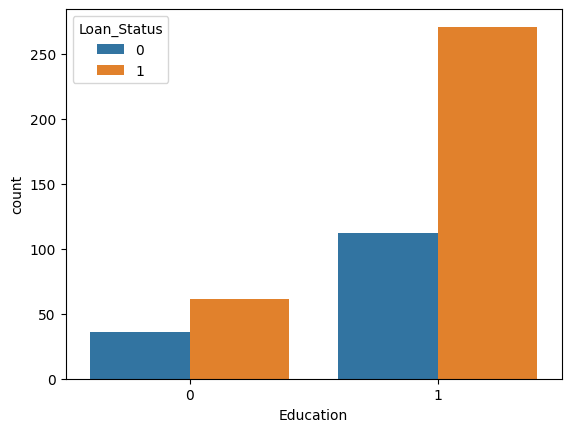

In [ ]:
sns.countplot(x='Education' , hue='Loan_Status' , data=data)

<Axes: xlabel='Married', ylabel='count'>

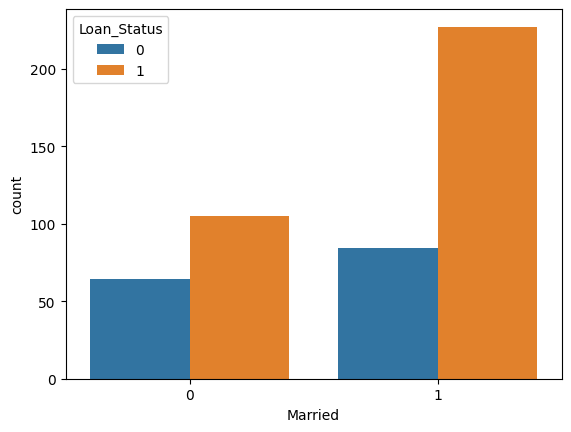

In [ ]:
sns.countplot(x='Married' , hue='Loan_Status' , data=data)

<Axes: xlabel='Self_Employed', ylabel='count'>

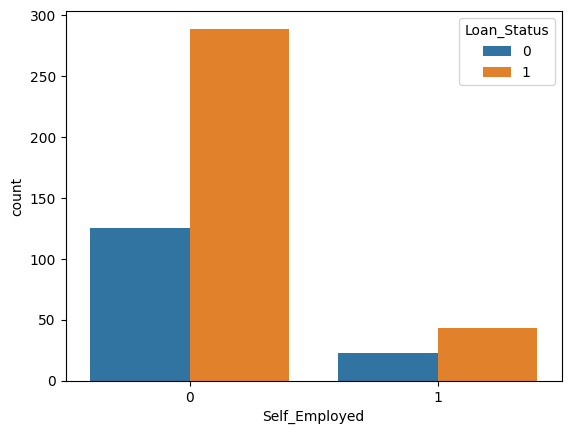

In [ ]:
X=data.drop(columns=['Loan_ID' , 'Loan_Status'], axis=1)
Y=data['Loan_Status']sns.countplot(x='Self_Employed' , hue='Loan_Status' , data=data)

In [ ]:
data= data.replace(to_replace='3+' ,  value=4)
data.replace(
    {'Gender':{'Male':1 , 'Female':0}
    , 'Married':{'No':0 , 'Yes':1} ,
    'Dependent' :{'3+':4} ,
    'Education':{'Graduate':1 , 'Not Graduate':0} ,
    'Self_Employed':{'No':0 , 'Yes':1} ,
    'Property_Area':{'Rural':0 , 'Semiurban':1 , 'Urban':2} ,
    'Loan_Status':{'N':0 , 'Y':1}} ,
    inplace=True)
X=data.drop(columns=['Loan_ID' , 'Loan_Status'], axis=1)
Y=data['Loan_Status']
X_train , X_test , Y_train , Y_test =train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
print(Y.shape , Y_train.shape , Y_test.shape)

(480,) (432,) (48,)


In [ ]:
model=SVC(kernel='linear')
model.fit(X_train , Y_train)


SVC(kernel='linear')

In [ ]:
X_train_pred=model.predict(X_train)
X_training_score=accuracy_score(X_train_pred , Y_train)
print('Accuracy on training data :' , X_training_score)

Accuracy on training data : 0.7986111111111112


In [ ]:
X_test_pred=model.predict(X_test)
x_test_score=accuracy_score(X_test_pred , Y_test)
print('Accuracy on test data :' , x_test_score)

Accuracy on test data : 0.8333333333333334
